In [35]:
import matplotlib  
import matplotlib.pyplot as plt  
import matplotlib.ticker as ticker  
from matplotlib.font_manager import FontProperties  
import numpy as np 
from matplotlib import rcParams
import math

rcParams['font.sans-serif'] = ['SimHei']
rcParams['axes.unicode_minus'] = False

In [40]:
code = 1
strategy = []
adequate = 1000
class elements:
    def __init__(self, a, b, c, d, e, f, g, h, i, j, k, l):
        # 情况 1 的输入参数
        self.Fitting_One_DefectivePercentage = a  # 零配件 1 的次品率
        self.Fitting_Two_DefectivePercentage = b  # 零配件 2 的次品率
        self.Nonconforming = c  # 成品的次品率
        self.Fitting_One_Cost = d  # 零配件 1 的采购单价
        self.Fitting_Two_Cost = e  # 零配件 2 的采购单价
        self.Fitting_One_Detected = f  # 零配件 1 的检测成本
        self.Fitting_Two_Detected = g  # 零配件 2 的检测成本
        self.Product_Assemble = h  # 成品的装配成本
        self.Product_Detect = i  # 成品的检测成本
        self.Product_AfterCost = j  # 成品的调换损失
        self.Dismantling = k  # 不合格成品的拆解费用
        self.Price = l  # 成品的市场售价
    pass

    # 阶段 3：不合格成品拆解
    def part3(self, n, s4):
        res = []
        if s4 == 0:
            # 不拆解不合格成品
            # 不拆解时收益： 0, 其余费用已经在之前支付，当前环节没有任何损失与收益
            dp[(3, 0)] = -n * self.Nonconforming * (self.Product_Assemble + self.Product_Detect + self.Fitting_Two_Cost + self.Fitting_One_Cost)
            dcPath[(3, 0)] = "不拆解不合格成品"
            res = [dcPath[(3, 0)] ,dp[(3, 0)]]
        else:
            # 拆解不合格成品
            En2 = (n * self.Nonconforming + n * self.Nonconforming * (1 - self.Fitting_Two_DefectivePercentage) + n * self.Fitting_One_DefectivePercentage + (1 - self.Fitting_One_DefectivePercentage) * n * self.Nonconforming + n * (1 - self.Fitting_Two_DefectivePercentage - (1 - self.Nonconforming) * (1 - self.Fitting_Two_DefectivePercentage) * (1 - self.Fitting_One_DefectivePercentage))) / 4
            En1 = (n * self.Nonconforming + n * self.Nonconforming * (1 - self.Fitting_Two_DefectivePercentage) + self.Fitting_Two_DefectivePercentage * n + n * self.Nonconforming * (1 - self.Fitting_One_DefectivePercentage) + n * (1 - self.Fitting_One_DefectivePercentage - (1 - self.Nonconforming) * (1 - self.Fitting_Two_DefectivePercentage) * (1 - self.Fitting_One_DefectivePercentage))) / 4
            dp[(3, 1)] = -self.Dismantling * n + En1 * self.Fitting_One_Cost + En2 * self.Fitting_Two_Cost
            dcPath[(3, 1)] = "拆解不合格成品"
            res = [dcPath[(3, 1)], dp[(3, 1)]]
        strategy.append(res)

    # 阶段 2：成品装配和检测决策
    def part2(self, n, s3, s4):
        self.part3(n, s4)
        res = []
        if s3 == 0:
            # 不检测成品
            dp[(2, 0)] = -self.Nonconforming * self.Product_AfterCost * n + self.Price * n
            dcPath[(2, 0)] = "不检测成品"
            res = [dcPath[(2, 0)], dp[(2, 0)]]
        else:
            # 检测成品
            dp[(2, 1)] = -self.Product_Detect * n + (1 - self.Nonconforming) * self.Price * n
            dcPath[(2, 1)] = "检测成品"
            res = [dcPath[(2, 1)], dp[(2, 1)]]
        strategy[-1] = [f"{res[0]},{strategy[-1][0]}", strategy[-1][1] + res[1]]
    # 阶段 1：零配件采购和检测决策
    def part1(self, n, s1, s2, s3, s4):
        self.part2(n, s3, s4)
        res = []
        if s1 == 1 and s2 == 1:
            # 检测零配件 1 和零配件 2
            dp[(1, 1, 1)] = -(self.Fitting_One_Detected + self.Fitting_One_Cost + self.Fitting_Two_Cost + self.Fitting_Two_Detected) * n
            dcPath[(1, 1, 1)] = "检测零配件1，检测零配件2"
            res = [dcPath[(1, 1, 1)], dp[(1, 1, 1)]]
        elif s1 == 1 and s2 == 0:
            # 检测零配件 1,不检测零配件 2
            dp[(1, 1, 0)] = -(self.Fitting_One_Detected + self.Fitting_One_Cost + self.Fitting_Two_Cost + self.Fitting_Two_DefectivePercentage * self.Product_AfterCost) * n
            dcPath[(1, 1, 0)] = "检测零配件1，不检测零配件2"
            res = [dcPath[(1, 1, 0)], dp[(1, 1, 0)]]
        elif s1 == 0 and s2 == 1:
            # 不检测零配件 1,检测零配件 2
            dp[(1, 0, 1)] = -(self.Fitting_One_Cost + self.Fitting_Two_Cost + self.Fitting_Two_Detected + self.Fitting_One_DefectivePercentage * self.Product_AfterCost) * n
            dcPath[(1, 0, 1)] = "不检测零配件1，检测零配件2"
            res = [dcPath[(1, 0, 1)], dp[(1, 0, 1)]]
        elif s1 == 0 and s2 == 0:
            # 不检测零配件 1 和零配件 2
            dp[(1, 0, 0)] = -(self.Fitting_One_Cost + self.Fitting_Two_Cost + self.Fitting_One_DefectivePercentage * self.Product_AfterCost + self.Fitting_Two_DefectivePercentage * self.Product_AfterCost) * n
            dcPath[(1, 0, 0)] = "不检测零配件1，不检测零配件2"
            res = [dcPath[(1, 0, 0)], dp[(1, 0, 0)]]
        strategy[-1] = [f"{res[0]},{strategy[-1][0]}", math.ceil(strategy[-1][1] + res[1])]

# 初始化 DP 表
dp = {}
dcPath = {}

cases = [
    {'零配件1次品率': 0.1, '零配件2次品率': 0.1, '成品次品率': 0.1, '零配件1检测成本': 2, '零配件2检测成本': 3, '成品检测成本': 3, '装配成本': 6, '市场售价': 56, '调换损失': 6, '拆解费用': 5},
    {'零配件1次品率': 0.2, '零配件2次品率': 0.2, '成品次品率': 0.2, '零配件1检测成本': 2, '零配件2检测成本': 3, '成品检测成本': 3, '装配成本': 6, '市场售价': 56, '调换损失': 6, '拆解费用': 5},
    {'零配件1次品率': 0.1, '零配件2次品率': 0.1, '成品次品率': 0.1, '零配件1检测成本': 2, '零配件2检测成本': 3, '成品检测成本': 3, '装配成本': 6, '市场售价': 56, '调换损失': 30, '拆解费用': 5},
    {'零配件1次品率': 0.2, '零配件2次品率': 0.2, '成品次品率': 0.2, '零配件1检测成本': 1, '零配件2检测成本': 1, '成品检测成本': 2, '装配成本': 6, '市场售价': 56, '调换损失': 30, '拆解费用': 5},
    {'零配件1次品率': 0.1, '零配件2次品率': 0.2, '成品次品率': 0.1, '零配件1检测成本': 8, '零配件2检测成本': 1, '成品检测成本': 2, '装配成本': 6, '市场售价': 56, '调换损失': 10, '拆解费用': 5},
    {'零配件1次品率': 0.05, '零配件2次品率': 0.05, '成品次品率': 0.05, '零配件1检测成本': 2, '零配件2检测成本': 3, '成品检测成本': 3, '装配成本': 6, '市场售价': 56, '调换损失': 10, '拆解费用': 40}
]

dicts = {
    "检测零配件 1,检测零配件 2,检测成品,拆解不合格成品" : 0,
    "检测零配件 1,检测零配件 2,检测成品,不拆解不合格成品" : 0,
    "检测零配件 1,检测零配件 2,不检测成品,拆解不合格成品" : 0,
    "检测零配件 1,不检测零配件 2,检测成品,拆解不合格成品" : 0,
    "不检测零配件 1,检测零配件 2,检测成品,拆解不合格成品" : 0,
    "不检测零配件 1,不检测零配件 2,检测成品,拆解不合格成品" : 0,
    "不检测零配件 1,检测零配件 2,不检测成品,拆解不合格成品" : 0,
    "不检测零配件 1,检测零配件 2,检测成品,不拆解不合格成品" : 0,
    "检测零配件 1,不检测零配件 2,不检测成品,拆解不合格成品" : 0,
    "检测零配件 1,不检测零配件 2,检测成品,不拆解不合格成品" : 0,
    "检测零配件 1,检测零配件 2,不检测成品,不拆解不合格成品" : 0,
    "不检测零配件 1,不检测零配件 2,不检测成品,拆解不合格成品" : 0,
    "不检测零配件 1,不检测零配件 2,检测成品,不拆解不合格成品" : 0,
    "不检测零配件 1,检测零配件 2,不检测成品,不拆解不合格成品" : 0,
    "检测零配件 1,不检测零配件 2,不检测成品,不拆解不合格成品" : 0,
    "不检测零配件 1,不检测零配件 2,不检测成品,不拆解不合格成品" : 0
}

In [41]:
category = []
adequate = 1000

In [42]:
for case_num, case_data in enumerate(cases, start=1):  # 使用enumerate来获取情况编号
    Acase = elements(case_data['零配件1次品率'], case_data['零配件2次品率'], case_data['成品次品率'], 4, 18,
                     case_data['零配件1检测成本'], case_data['零配件2检测成本'], case_data['装配成本'],
                     case_data['成品检测成本'], case_data['调换损失'], case_data['拆解费用'], case_data['市场售价'])

    # for i in range(1, 1000):
    i = 100
    for s1 in [0, 1]:
        for s2 in [0, 1]:
            for s3 in [0, 1]:
                for s4 in [0, 1]:
                    Acase.part1(i, s1, s2, s3, s4)

    Column_Data = [(item[1] + adequate) for item in strategy]
    category.append(Column_Data)
    
    strategy.clear()
    pass

In [43]:
# for item in range(len(cases)):
#     elements.Fitting_One_DefectivePercentage = cases[item]['零配件1次品率']
#     elements.Fitting_Two_DefectivePercentage = cases[item]['零配件2次品率']
#     elements.Nonconforming = cases[item]['成品次品率']
#     elements.Fitting_One_Cost = 4
#     elements.Fitting_Two_Cost = 18
#     elements.Fitting_One_Detected = cases[item]['零配件1检测成本']
#     elements.Fitting_Two_Detected = cases[item]['零配件2检测成本']
#     elements.Product_Assemble = cases[item]['装配成本']
#     elements.Product_Detect = cases[item]['成品检测成本']
#     elements.Product_AfterCost = cases[item]['调换损失']
#     elements.Dismantling = cases[item]['拆解费用']
#     elements.Price = cases[item]['市场售价']
    
#     i = 30
#     for s1 in [0, 1]:
#         for s2 in [0, 1]:
#             for s3 in [0, 1]:
#                 for s4 in [0, 1]:
#                     part1(i, s1, s2, s3, s4)

#     Column_Data = [(item[1] + adequate) for item in strategy]
#     category.append(Column_Data)
    
#     strategy.clear()
#     pass

In [44]:
print(category)

[[3910, 4024, 3110, 3224, 3670, 3784, 2870, 2984, 3770, 3884, 2970, 3084, 3530, 3644, 2730, 2844], [3420, 4095, 2120, 2795, 3240, 3915, 1940, 2615, 3340, 4015, 2040, 2715, 3160, 3835, 1860, 2535], [3190, 3304, 2630, 2744, 3190, 3304, 2630, 2744, 3290, 3404, 2730, 2844, 3290, 3404, 2730, 2844], [2000, 2655, 1280, 1935, 2500, 3155, 1780, 2435, 2500, 3155, 1780, 2435, 3000, 3655, 2280, 2935], [3700, 3808, 3040, 3148, 3800, 3908, 3140, 3248, 3000, 3108, 2340, 2448, 3100, 3208, 2440, 2548], [4095, 409, 3565, -121, 3845, 159, 3315, -371, 3945, 259, 3415, -271, 3695, 9, 3165, -521]]


In [47]:
save_path = r"C:\Users\15638\Desktop\JupyterCode\pictures\pict2"

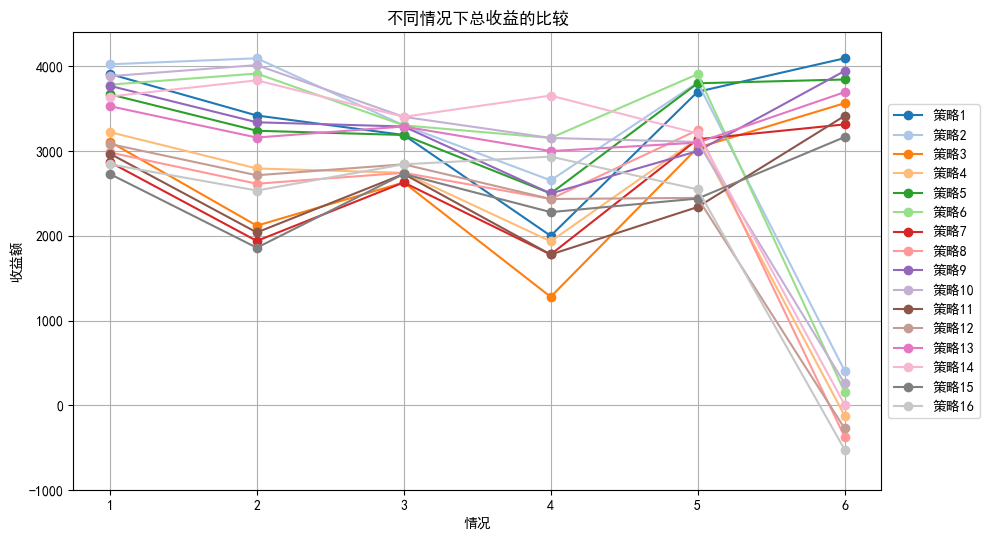

In [46]:
# 假设有16组数据，每组数据有6个点  
# 这里用随机数生成数据作为示例，实际使用时请替换为真实数据  
data = np.transpose(np.array(category))
  
# 创建一个图形和一个子图  
fig, ax = plt.subplots()  
  
# 定义颜色列表，确保16条折线颜色不同  
colors = matplotlib.colormaps['tab20'].colors[:16]
  
# 定义图例标签  
legend_labels = [f'策略{i+1}' for i in range(16)]  
  
# 绘制折线图  
for i, (datum, color, label) in enumerate(zip(data, colors, legend_labels)):  
    ax.plot(range(1, 7), datum, color=color, label=label, marker='o')   
  
# 设置纵轴和横轴标签  
ax.set_ylabel('收益额')  
ax.set_xlabel('情况')  
  
# 设置纵轴范围和分度值  
ax.set_ylim(-1000, 4400)  
ax.set_yticks(np.arange(-1000, 4401, 1000))  
  
# 设置横轴刻度标签 
ax.set_xticks(range(1, 7))  
ax.set_xticklabels(['1', '2', '3', '4', '5', '6'])  
  
# 添加图例  
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)  
  
# 添加中文标题（使用windows自带的中文文本）  
ax.set_title('不同情况下总收益的比较')  

fig.set_size_inches(10, 5.5) 
plt.tight_layout()

# 添加网格线  
plt.grid(True)

# 保存图像  
plt.savefig(save_path)

# 显示图形  
plt.show()

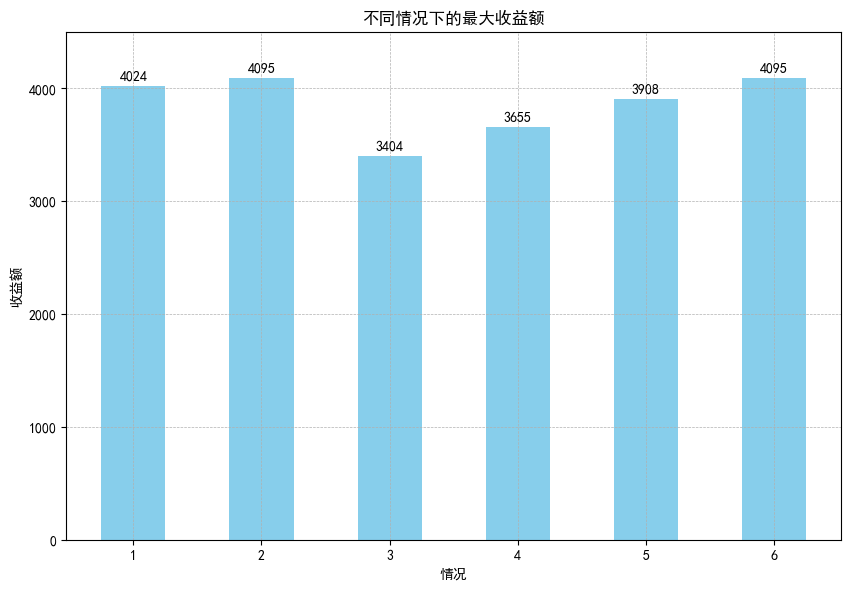

In [48]:
# 假设有6种情况，收益额数据随意设置（这里用占位符表示）  
situations = ['1', '2', '3', '4', '5', '6']  
profits = [max(row) for row in category]

# 创建图形和子图  
fig, ax = plt.subplots(figsize=(10, 6.6))  
# 创建柱状图  
bars = ax.bar(situations, profits, width = 0.5, color='skyblue') 
  
# 设置纵轴标签和范围  
plt.ylabel('收益额')  
plt.ylim(0, 4500)  
  
# 设置纵轴分度值  
plt.yticks(np.arange(0, 4501, 1000))  
  
# 添加网格  
plt.grid(True, linestyle='--', linewidth=0.5)  



# 在柱状图柱子上方添加值  
for bar in bars:  
    height = bar.get_height()  
    ax.annotate(  
        f'{height}',                # 标签内容  
        xy=(bar.get_x() + bar.get_width() / 2, height), # 标签位置  
        xytext=(0, 3),              # 在y轴方向偏移3点  
        textcoords="offset points", # 使用偏移点坐标系  
        ha='center',                # 水平居中对齐  
        va='bottom'                 # 垂直方向居下对齐  
    )  
  
# 设置横轴标签  
plt.xlabel('情况')  
  
# 显示图表标题  
plt.title('不同情况下的最大收益额')  

# 保存图像  
plt.savefig(save_path)
  
# 显示图表  
plt.show()